![title](gen.jpg)

# Genpact Machine Learning Hackathon

Genpact and Analytics Vidhya presents the “Genpact Machine Learning Hackathon 2018”. A great opportunity to showcase your machine learning and analytical abilities and compete with the best data scientists out there.


## Problem Statement
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Sec
ondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:
 

* Historical data of demand for a product-center combination (Weeks: 1 to 145)
* Product(Meal) features such as category, sub-category, current price and discount
* Information for fulfillment center like center area, city information etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
meal=pd.read_csv('meal_info.csv')
ful=pd.read_csv('fulfilment_center_info.csv')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


### meal_info.csv
Contains information for each meal being served

In [3]:
meal['combo']=meal['category']+" "+meal['cuisine']
meal.head()

,meal_id,category,cuisine,combo
0,1885,Beverages,Thai,Beverages Thai
1,1993,Beverages,Thai,Beverages Thai
2,2539,Beverages,Thai,Beverages Thai
3,1248,Beverages,Indian,Beverages Indian
4,2631,Beverages,Indian,Beverages Indian


In [4]:
meal.cuisine.value_counts()

Thai           15
Italian        12
Indian         12
Continental    12
Name: cuisine, dtype: int64

### fulfilment_center_info.csv: 
Contains information for each fulfilment center

In [ ]:
ful.head()

In [5]:
ful.center_type.value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable

In [6]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00


In [7]:
train.center_id.nunique()

77

In [8]:
ful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


## Merging & Feature Engg

In [52]:
df=train.merge(meal,on=['meal_id'],how='left')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,combo
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,Beverages Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,Beverages Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,Beverages Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,Beverages Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,Beverages Indian


In [53]:
df=df.merge(ful,on=['center_id'],how='left')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,combo,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,Beverages Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,Beverages Indian,647,56,TYPE_C,2.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 16 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
combo                    456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(9), object(4)
memory usage: 59.2+ MB


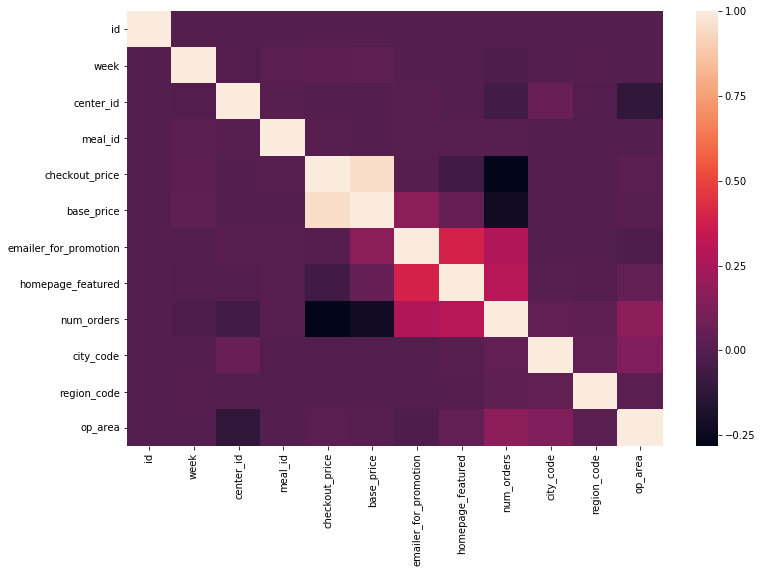

In [55]:
sns.heatmap(df.corr())

In [56]:
df['discount']=df['base_price']-df['checkout_price']
df['discount_per']=(df['discount']/df['base_price'])*100
df['op_dis']=df['discount_per']*df['op_area']
df['promo_homepage']=df['emailer_for_promotion']+df['homepage_featured']
df['center_id']=df['center_id'].astype(np.object)
df['meal_id']=df['meal_id'].astype(np.object)
df['city_code']=df['city_code'].astype(np.object)
df['region_code']=df['region_code'].astype(np.object)

df=pd.get_dummies(df,drop_first=True)

In [57]:
df.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,discount,discount_per,...,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,136.83,152.29,0,0,177,2.0,15.46,10.151684,...,0,0,0,1,0,0,0,0,0,1
1,1466964,1,136.83,135.83,0,0,270,2.0,-1.00,-0.736214,...,0,0,0,1,0,0,0,0,0,1
2,1346989,1,134.86,135.86,0,0,189,2.0,1.00,0.736052,...,0,0,0,1,0,0,0,0,0,1
3,1338232,1,339.50,437.53,0,0,54,2.0,98.03,22.405321,...,0,0,0,1,0,0,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,2.0,-1.00,-0.412371,...,0,0,0,1,0,0,0,0,0,1


In [58]:
df.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,discount,discount_per,...,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,136.83,152.29,0,0,177,2.0,15.46,10.151684,...,0,0,0,1,0,0,0,0,0,1
1,1466964,1,136.83,135.83,0,0,270,2.0,-1.00,-0.736214,...,0,0,0,1,0,0,0,0,0,1
2,1346989,1,134.86,135.86,0,0,189,2.0,1.00,0.736052,...,0,0,0,1,0,0,0,0,0,1
3,1338232,1,339.50,437.53,0,0,54,2.0,98.03,22.405321,...,0,0,0,1,0,0,0,0,0,1
4,1448490,1,243.50,242.50,0,0,40,2.0,-1.00,-0.412371,...,0,0,0,1,0,0,0,0,0,1


## Random Forest

In [15]:
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics mean_squared_log_error
import warnings
import seaborn as sns

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
Xd,yd=df.drop(['id','num_orders'],axis=1),df.num_orders
X_train,X_val,y_train,y_val = train_test_split(Xd,yd,test_size=0.25,random_state = 1994)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
p=rf.predict(X_val)
print(100*np.sqrt(mean_squared_log_error(y_val,p)))

49.5742982634637


In [52]:
sorted(zip(rf.feature_importances_,X_train),reverse=True)

[(24.23763958267203, 'meal_id'),
 (11.330688311201175, 'op_area'),
 (8.008253875226549, 'emailer_for_promotion'),
 (7.798948761705107, 'checkout_price'),
 (6.892386682830999, 'discount_per'),
 (5.9073133896881815, 'homepage_featured'),
 (3.339585160725901, 'category_Sandwich'),
 (3.1859658401908577, 'week'),
 (2.985487982280809, 'region_code_56'),
 (2.918905232494835, 'base_price'),
 (2.8055189523057136, 'cuisine_Indian'),
 (2.7051539252941916, 'city_code'),
 (2.6781334102185617, 'category_Rice Bowl'),
 (2.152326949257348, 'cuisine_Italian'),
 (1.8316094739568005, 'center_type_TYPE_C'),
 (1.1066781602039606, 'region_code_77'),
 (1.091288321805316, 'center_id_43'),
 (1.0344139748507328, 'region_code_34'),
 (0.9213329329005802, 'center_type_TYPE_B'),
 (0.82420035134114, 'category_Salad'),
 (0.7128852048825406, 'center_id_11'),
 (0.6858050679360456, 'center_id_13'),
 (0.6824064207910291, 'discount'),
 (0.6050745372194457, 'region_code_85'),
 (0.594094169385584, 'center_id_137'),
 (0.31300

## Test data

In [59]:
dftest=test.merge(meal,on=['meal_id'],how='left')
dftest=dftest.merge(ful,on=['center_id'],how='left')
dftest.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,combo,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,Beverages Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,Beverages Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,Beverages Indian,647,56,TYPE_C,2.0


In [60]:
dftest['discount']=dftest['base_price']-dftest['checkout_price']
dftest['discount_per']=(dftest['discount']/dftest['base_price'])*100
dftest['op_dis']=dftest['discount_per']*dftest['op_area']
dftest['promo_homepage']=dftest['emailer_for_promotion']+dftest['homepage_featured']
dftest['center_id']=dftest['center_id'].astype(np.object)
dftest['meal_id']=dftest['meal_id'].astype(np.object)
dftest['city_code']=dftest['city_code'].astype(np.object)
dftest['region_code']=dftest['region_code'].astype(np.object)

In [61]:
dftest.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
combo                    0
city_code                0
region_code              0
center_type              0
op_area                  0
discount                 0
discount_per             0
op_dis                   0
promo_homepage           0
dtype: int64

In [62]:
dftest_dum=pd.get_dummies(dftest,drop_first=True)
dftest_dum.shape

(32573, 228)

In [65]:
Xd.shape

(456548, 227)

## Kfold

In [45]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=6,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(Xd,yd):
    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
    y_train, y_test = yd[train_index], yd[test_index]
    print('start')
    rf=RandomForestRegressor(n_estimators=300,verbose=1,random_state=1994)
    rf.fit(X_train,y_train)
    print('pred...')
    p=rf.predict(X_test)
    print("err: ",100*np.sqrt(mean_squared_log_error(y_test,p)))
    err.append(100*np.sqrt(mean_squared_log_error(y_test,p)))
    pred = rf.predict(dftest_dum.drop('id',axis=1))
    y_pred_tot.append(pred)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


start


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 29.3min finished


pred...


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.2min finished


err:  49.32714618950166


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   33.1s finished


start


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 27.1min finished


pred...


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 10.6min finished


err:  49.15266683151464


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.6min finished


start


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 13.8min finished


pred...


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.8min finished


err:  49.20450624994613


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.7s finished


start


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 14.3min finished


pred...


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.3min finished


err:  49.054003652586445


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.5s finished


start


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 14.0min finished


pred...


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.1min finished


err:  49.643250480497976


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.5min finished


In [46]:
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)

49.27631468080937


In [47]:
y_pred_tot

[array([100.155,  88.155, 174.855, ..., 326.965, 364.2  , 179.3  ]),
 array([ 98.66 ,  85.66 , 180.365, ..., 317.145, 324.145, 158.58 ]),
 array([112.41 , 138.01 , 142.895, ..., 341.855, 394.15 , 181.315]),
 array([ 87.55 ,  81.075, 227.24 , ..., 282.97 , 321.845, 183.135]),
 array([ 97.615,  79.105, 181.33 , ..., 332.6  , 390.545, 161.31 ])]

In [48]:
s=pd.DataFrame({'id':test.id,'num_orders':y_pred})
s.to_csv('stackedrf200.csv',index=False)
s.head()

,id,num_orders
0,1028232,99.278
1,1127204,94.401
2,1212707,181.337
3,1082698,69.241
4,1400926,62.165


### from kaggle kernel KaggleKernelGenpactCatboost.ipynb


In [ ]:
scb=pd.read_csv('stackedCBfold5.csv')
scb['num_orders']=(scb['num_orders']+s['num_orders'])/2
scb.head()


In [50]:
scb.to_csv('st_cb_rf1_final_sub.csv',index=False)